In [2]:
import numpy as np
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [8]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r"G:\Study Material\Python for Data Science by CB\movie recommendation system\ml-100k\u.data", sep ='\t', names = columns)


In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
df.shape

(100000, 4)

In [11]:
df['user_id'].nunique()

943

In [12]:
df['item_id'].nunique()

1682

In [15]:
movies_title = pd.read_csv(r"G:\Study Material\Python for Data Science by CB\movie recommendation system\ml-100k\u.item", sep = '\|', header = None)

In [16]:
movies_title.shape

(1682, 24)

In [17]:
movies_title = movies_title[[0,1]]

In [19]:
movies_title.columns = ['item_id', 'title']

In [20]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [21]:
df = pd.merge(df, movies_title, on = "item_id")

In [23]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [26]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [28]:
df.groupby('title').count()['rating'].sort_values(ascending = False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [29]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [30]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [38]:
ratings['num of ratings'] = df.groupby('title').count()['rating']

In [39]:
ratings.head()

,rating,mun of ratings,num of ratings
title,,,
'Til There Was You (1997),2.333333,9,9
1-900 (1994),2.600000,5,5
101 Dalmatians (1996),2.908257,109,109
12 Angry Men (1957),4.344000,125,125
187 (1997),3.024390,41,41


In [40]:
ratings.sort_values(by = 'rating', ascending = False).head()

,rating,mun of ratings,num of ratings
title,,,
They Made Me a Criminal (1939),5.0,1,1
Marlene Dietrich: Shadow and Light (1996),5.0,1,1
"Saint of Fort Washington, The (1993)",5.0,2,2
Someone Else's America (1995),5.0,1,1
Star Kid (1997),5.0,3,3


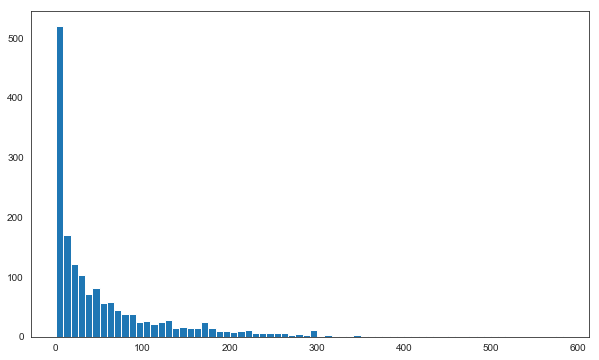

In [41]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num of ratings'], bins=70)
plt.show()

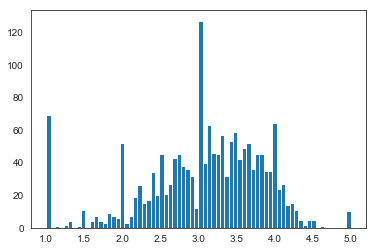

In [43]:
plt.hist(ratings['rating'], bins = 70)
plt.show()

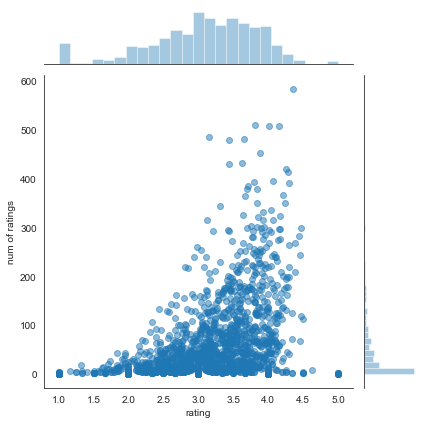

In [44]:
sns.jointplot(x='rating' , y='num of ratings' , data = ratings, alpha = 0.5)

### Creting Movie Recommendation

In [45]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [46]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [47]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [48]:
ratings.sort_values('num of ratings', ascending = False).head()

,rating,mun of ratings,num of ratings
title,,,
Star Wars (1977),4.358491,583,583
Contact (1997),3.803536,509,509
Fargo (1996),4.155512,508,508
Return of the Jedi (1983),4.007890,507,507
Liar Liar (1997),3.156701,485,485


In [51]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [53]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

In [56]:
corr_of_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation'])

In [59]:
corr_of_starwars.dropna(inplace = True)

In [60]:
corr_of_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [62]:
corr_of_starwars.sort_values('correlation', ascending = False).head(10)

,correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [63]:
ratings

,rating,mun of ratings,num of ratings
title,,,
'Til There Was You (1997),2.333333,9,9
1-900 (1994),2.600000,5,5
101 Dalmatians (1996),2.908257,109,109
12 Angry Men (1957),4.344000,125,125
187 (1997),3.024390,41,41
2 Days in the Valley (1996),3.225806,93,93
"20,000 Leagues Under the Sea (1954)",3.500000,72,72
2001: A Space Odyssey (1968),3.969112,259,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5,5


In [66]:
corr_of_starwars = corr_of_starwars.join(ratings['num of ratings'])
corr_of_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [69]:
corr_of_starwars[corr_of_starwars['num of ratings'] >= 100 ].sort_values('correlation', ascending = False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [71]:
def predict_movie(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_of_movie = pd.DataFrame(similar_to_movie, columns = ['correlation'])
    corr_of_movie.dropna(inplace = True)
    
    corr_of_movie = corr_of_movie.join(ratings['num of ratings'])
    predictions = corr_of_movie[corr_of_movie['num of ratings'] >= 100 ].sort_values('correlation', ascending = False)
    
    return predictions

In [72]:
predictions = predict_movie('Titanic (1997)')

In [73]:
predictions.head()

,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
